In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

import shap

In [3]:
#reading in the datasets
calendar_df = pd.read_csv('./Data/calendar.csv')
listings_df = pd.read_csv('./Data/listings.csv')
reviews_df = pd.read_csv('./Data/reviews.csv')

# Key questions to answer
* what are the most important features that impact listing price?
* Which Boston neighbourhoods have the most expensive listings?


## What are the key factors impacting price of the listing?

#### getting to know the data

In [4]:
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [5]:
listings_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,0.000000e+00,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


In [6]:
# dropping fully empty columns
listings_df_clean = listings_df.dropna(how='all', axis = 1)

#removing columns with just one unique value
listings_df_clean = listings_df_clean.loc[:, listings_df.nunique() != 1]

#removing rows with no Price
listings_df_clean = listings_df_clean.dropna(subset = ['price'], axis = 0)


#### A look at remaining columns:

In [7]:
listings_df_clean.columns

Index(['id', 'listing_url', 'name', 'summary', 'space', 'description',
       'neighborhood_overview', 'notes', 'transit', 'access', 'interaction',
       'house_rules', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed', 'city', 'zipcode',
       'market', 'smart_location', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price', 'weekly_price', 'monthly_price', 'security_deposit',
    

#### dropping columns

In [8]:
# some of the columns do not provide meaningful business information
technical_columns = ['id', 'listing_url', 'thumbnail_url',
                     'host_id', 'host_url','host_thumbnail_url',
                     'host_picture_url',
                     'medium_url', 'picture_url', 'xl_picture_url',
                     'latitude', 'longitude']
                     

#for now I am also dropping the open text columns, as I do not plan to use them in the initial version of the modelling

text_columns = ['name', 'notes', 'summary', 'space', 'description',
               'host_name', 'host_about', 'neighborhood_overview',
               'transit', 'access', 'interaction',
                'house_rules',]

listings_df_clean.drop(technical_columns, axis = 1, inplace = True)
listings_df_clean.drop(text_columns, axis = 1, inplace = True)



In [9]:
# checking if there are columns with >75% of missing values
(
    listings_df_clean.loc[:,(listings_df_clean.isnull().sum()
                             / listings_df_clean.shape[0])
                          >= 0.75]
    .isnull().sum()/listings_df_clean.shape[0]
)

square_feet      0.984379
weekly_price     0.751185
monthly_price    0.752301
dtype: float64

Dropping the suqare feet column with 98% of missing values. </br>
For weekly price and monthly price I decided to transform them into a binary variables "weekly_price_available", "monthly_price_available"

In [10]:
# dropping square_feet
listings_df_clean.drop(['square_feet'], axis = 1, inplace = True)

In [11]:
def transform_column_is_available(df, columns):
    '''
    INPUTS:
    df - data frame to be modified
    columns - list of column names to modify
    
    Function changes specified columns to binary,
    containing 1 when the orginal column had value and 0 when it was empty.
    Function drops the original columns
    
    '''
    
    for col in columns:
        new_col = col + '_available'
        if col in df.columns:
            df[new_col] = (~(df[col].isnull())).astype(int)
            print('column ', new_col, ' created')
            df.drop(col, inplace=True, axis=1)
            print('column ', col, ' dropped')


        

#transforming weekly_price and monthly_price to a binary variables

transform_column_is_available(listings_df_clean, ['weekly_price', 'monthly_price'])

column  weekly_price_available  created
column  weekly_price  dropped
column  monthly_price_available  created
column  monthly_price  dropped


In [12]:
# what's in the last_review / first_review columns?
listings_df_clean[['last_review', 'first_review', 'number_of_reviews']]

,last_review,first_review,number_of_reviews
0,NaN,NaN,0
1,2016-08-13,2014-06-01,36
2,2016-08-05,2009-07-19,41
3,2016-08-28,2016-08-28,1
4,2016-09-01,2015-08-18,29
...,...,...,...
3580,2016-08-27,2015-09-18,4
3581,NaN,NaN,0
3582,NaN,NaN,0
3583,2016-09-04,2016-08-27,2


Looks that first / last review is the date of first / last review. They contain missing values for listings that never received a review. </br>
I decided to fill the missing values in the last_review and first_review columns with an arbitrarly old date (1900-01-01)

#### transforming date columns to numeric interval in days

In [13]:
def date_to_interval(df, columns, end_date):
    '''
    INPUTS:
    df - dataframe to modify
    columns - list of columns to modify in the data frame
    end_date - string representation of date from which the interval in days will be calculated
    
    Function transforms data columns to an interval in days from specified date.
    Original columns are then dropped
    
    '''
    
    
    end_date = pd.to_datetime(end_date)
    
    for col in columns:
        if col in df.columns:
            #filling null values with an arbitrarly old date
            df[col].fillna('1900-01-01', inplace = True)
            #transforming to datetime
            df[col] = pd.to_datetime(df[col])
            new_col = col + '_interval'

            df[new_col] = (end_date - df[col]).dt.days
            print('column ', new_col, ' created')
            df.drop(col, inplace=True, axis=1)
            print('column ', col, ' dropped')
    


In [14]:
# for host_since, the end_date is 2016-09-06: the max value of the column in the data set
date_to_interval(listings_df_clean, ['host_since'], '2016-09-06')

#for review_first and review_last, the end_date id 2017-09-05, the date when the data set was created
date_to_interval(listings_df_clean, ['first_review', 'last_review'], '2017-09-05')

column  host_since_interval  created
column  host_since  dropped
column  first_review_interval  created
column  first_review  dropped
column  last_review_interval  created
column  last_review  dropped


#### A closer look at the address data

In [15]:
listings_df_clean.shape

(3585, 58)

In [16]:
listings_df_clean.city.value_counts()

Boston                       3381
Roxbury Crossing               24
Somerville                     19
Brookline                      18
Jamaica Plain                  18
Cambridge                      16
Charlestown                    15
Dorchester                     15
Brighton                       15
Allston                        12
Roslindale                      6
West Roxbury                    5
ROXBURY CROSSING                4
Mattapan                        3
East Boston                     3
South Boston                    2
Jamaica Plain                   2
Jamaica Plain, Boston           2
Hyde Park                       2
Boston, Massachusetts, US       2
ALLSTON                         2
Boston (Jamaica Plain)          1
Brighton                        1
Watertown                       1
Mission Hill, Boston            1
Jamaica Plain (Boston)          1
dorchester, boston              1
South End, Boston               1
Milton                          1
Boston        

In [17]:
listings_df_clean.market.value_counts()

Boston                   3568
Other (International)       1
San Francisco               1
Other (Domestic)            1
Name: market, dtype: int64

In [18]:
listings_df_clean.zipcode.value_counts()

02116          388
02130          331
02118          247
02215          236
02134          232
02114          231
02127          180
02135          172
02115          169
02128          146
02125          129
02120          115
02113          101
02119          100
02111           99
02129           90
02124           80
02210           75
02108           72
02131           65
02109           51
02122           44
02132           37
02121           29
02136           29
02126           24
02110           13
02145           12
02446            8
02143            7
02138            6
02139            6
02467            5
02445            5
02141            3
02163            3
02186            1
02142            1
02472            1
02218            1
02108 02111      1
02169            1
02134-1704       1
Name: zipcode, dtype: int64

In [19]:
listings_df_clean.smart_location.value_counts()

Boston, MA                       3381
Roxbury Crossing, MA               24
Somerville, MA                     19
Brookline, MA                      18
Jamaica Plain, MA                  18
Cambridge, MA                      16
Charlestown, MA                    15
Dorchester, MA                     15
Brighton, MA                       15
Allston, MA                        12
Roslindale, MA                      6
West Roxbury, MA                    5
ROXBURY CROSSING, MA                4
Mattapan, MA                        3
East Boston, MA                     3
MA                                  2
South Boston, MA                    2
Jamaica Plain, Boston, MA           2
Boston, Massachusetts, US, MA       2
ALLSTON, MA                         2
Hyde Park, MA                       2
Jamaica Plain , MA                  2
Jamaica plain , MA                  1
South End, Boston, MA               1
Newton, MA                          1
Jamaica Plain, MA, MA               1
Roslindale, 

In [20]:
listings_df_clean.street.nunique()

1239

#### Dropping all address related columns, except for neighbourhood_cleansed
* neighbourhood_cleansed column is a clean version of neighbourhood, with no missing values
* column street has 1239 unique values. Maybe a stree name in its own could be extarcted from the full address. For the sake of modelling and one-hot-encoding the values, I decided to exclude the steet feature
* city and smart_location columns contain 'Boston' in 95% of rows and other values often are different variations on the Boston spelling
* market column is 99% 'Boston'
* zipcode has a lot of unique values. One-hot encoding it would create realtively big number of new columns. Dropping it for now, although it may contain useful information, more precise than the nieghbourhood column

In [21]:
location_columns_to_drop = ['neighbourhood', 'street', 'city', 'smart_location',
                           'market', 'zipcode']
listings_df_clean.drop(location_columns_to_drop, axis = 1, inplace = True)

#### cleaning the price columns

In [22]:
def clean_numerical_columns(df, columns, symbols_to_drop):
    '''
    INPUTS:
    df - data frame to be modified
    columns - list of columns to be modified
    symbols_to_drop = list of symbols to be removed from the values
    
    Function formats the price columns, removing the specified characters and converting the value to float
    
    '''

    
    for col in columns:
        for symbol in symbols_to_drop:
            df[col] = df[col].str.replace(symbol, '')
            
        df[col] = df[col].astype(float)        
        df[col].fillna(0.00, inplace = True)

clean_numerical_columns(listings_df_clean,
                    columns = ['price', 'security_deposit', 'extra_people', 'cleaning_fee' ],
                   symbols_to_drop = ["$", ","])

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.


#### dealing with missing values

Review scores are spread across multiple columns, dealing with reviewed aspects of the listing </br>
I decided to fill missing values (not reviewed listings) with average score

#### Checking how do the missing values count look in the remaining numeric columns:

In [23]:
numeric_columns = listings_df_clean.select_dtypes(include=np.number).columns.tolist()

for col in numeric_columns:

    share_null = (listings_df_clean[col].isnull().sum() / listings_df_clean.shape[0])*100
#     print(col)
    print('column {} has {}% of empty values'.format(col, share_null))

column host_listings_count has 0.0% of empty values
column host_total_listings_count has 0.0% of empty values
column accommodates has 0.0% of empty values
column bathrooms has 0.3905160390516039% of empty values
column bedrooms has 0.2789400278940028% of empty values
column beds has 0.2510460251046025% of empty values
column price has 0.0% of empty values
column security_deposit has 0.0% of empty values
column cleaning_fee has 0.0% of empty values
column guests_included has 0.0% of empty values
column extra_people has 0.0% of empty values
column minimum_nights has 0.0% of empty values
column maximum_nights has 0.0% of empty values
column availability_30 has 0.0% of empty values
column availability_60 has 0.0% of empty values
column availability_90 has 0.0% of empty values
column availability_365 has 0.0% of empty values
column number_of_reviews has 0.0% of empty values
column review_scores_rating has 22.677824267782427% of empty values
column review_scores_accuracy has 22.9567642956764

Majority of the columns have no missing values.
</br>
* Bedrooms, beds and bathroom columns have <1% of missing values. I will fill them with mean </br>

* Review related columns have ~22% of missing values. </br>
    * For the review_score related columns I will input mean. Filling in 0 would mean a very negative review score. </br>
    * For the reviews_per_month column I will fill nulls with 0, as empty values most likely mean lack of reviews </br>



In [24]:
columns_fill_mean = ['bedrooms', 'bathrooms', 'beds',
                    'review_scores_rating', 'review_scores_accuracy',
                    'review_scores_cleanliness', 'review_scores_checkin',
                    'review_scores_communication', 'review_scores_location',
                    'review_scores_value']


listings_df_clean[columns_fill_mean] = listings_df_clean[columns_fill_mean].fillna(listings_df_clean[columns_fill_mean].mean())



columns_fill_0 = ['reviews_per_month']


listings_df_clean[columns_fill_0] =   listings_df_clean[columns_fill_0].fillna(0)

### correlation matrix for numerical columns

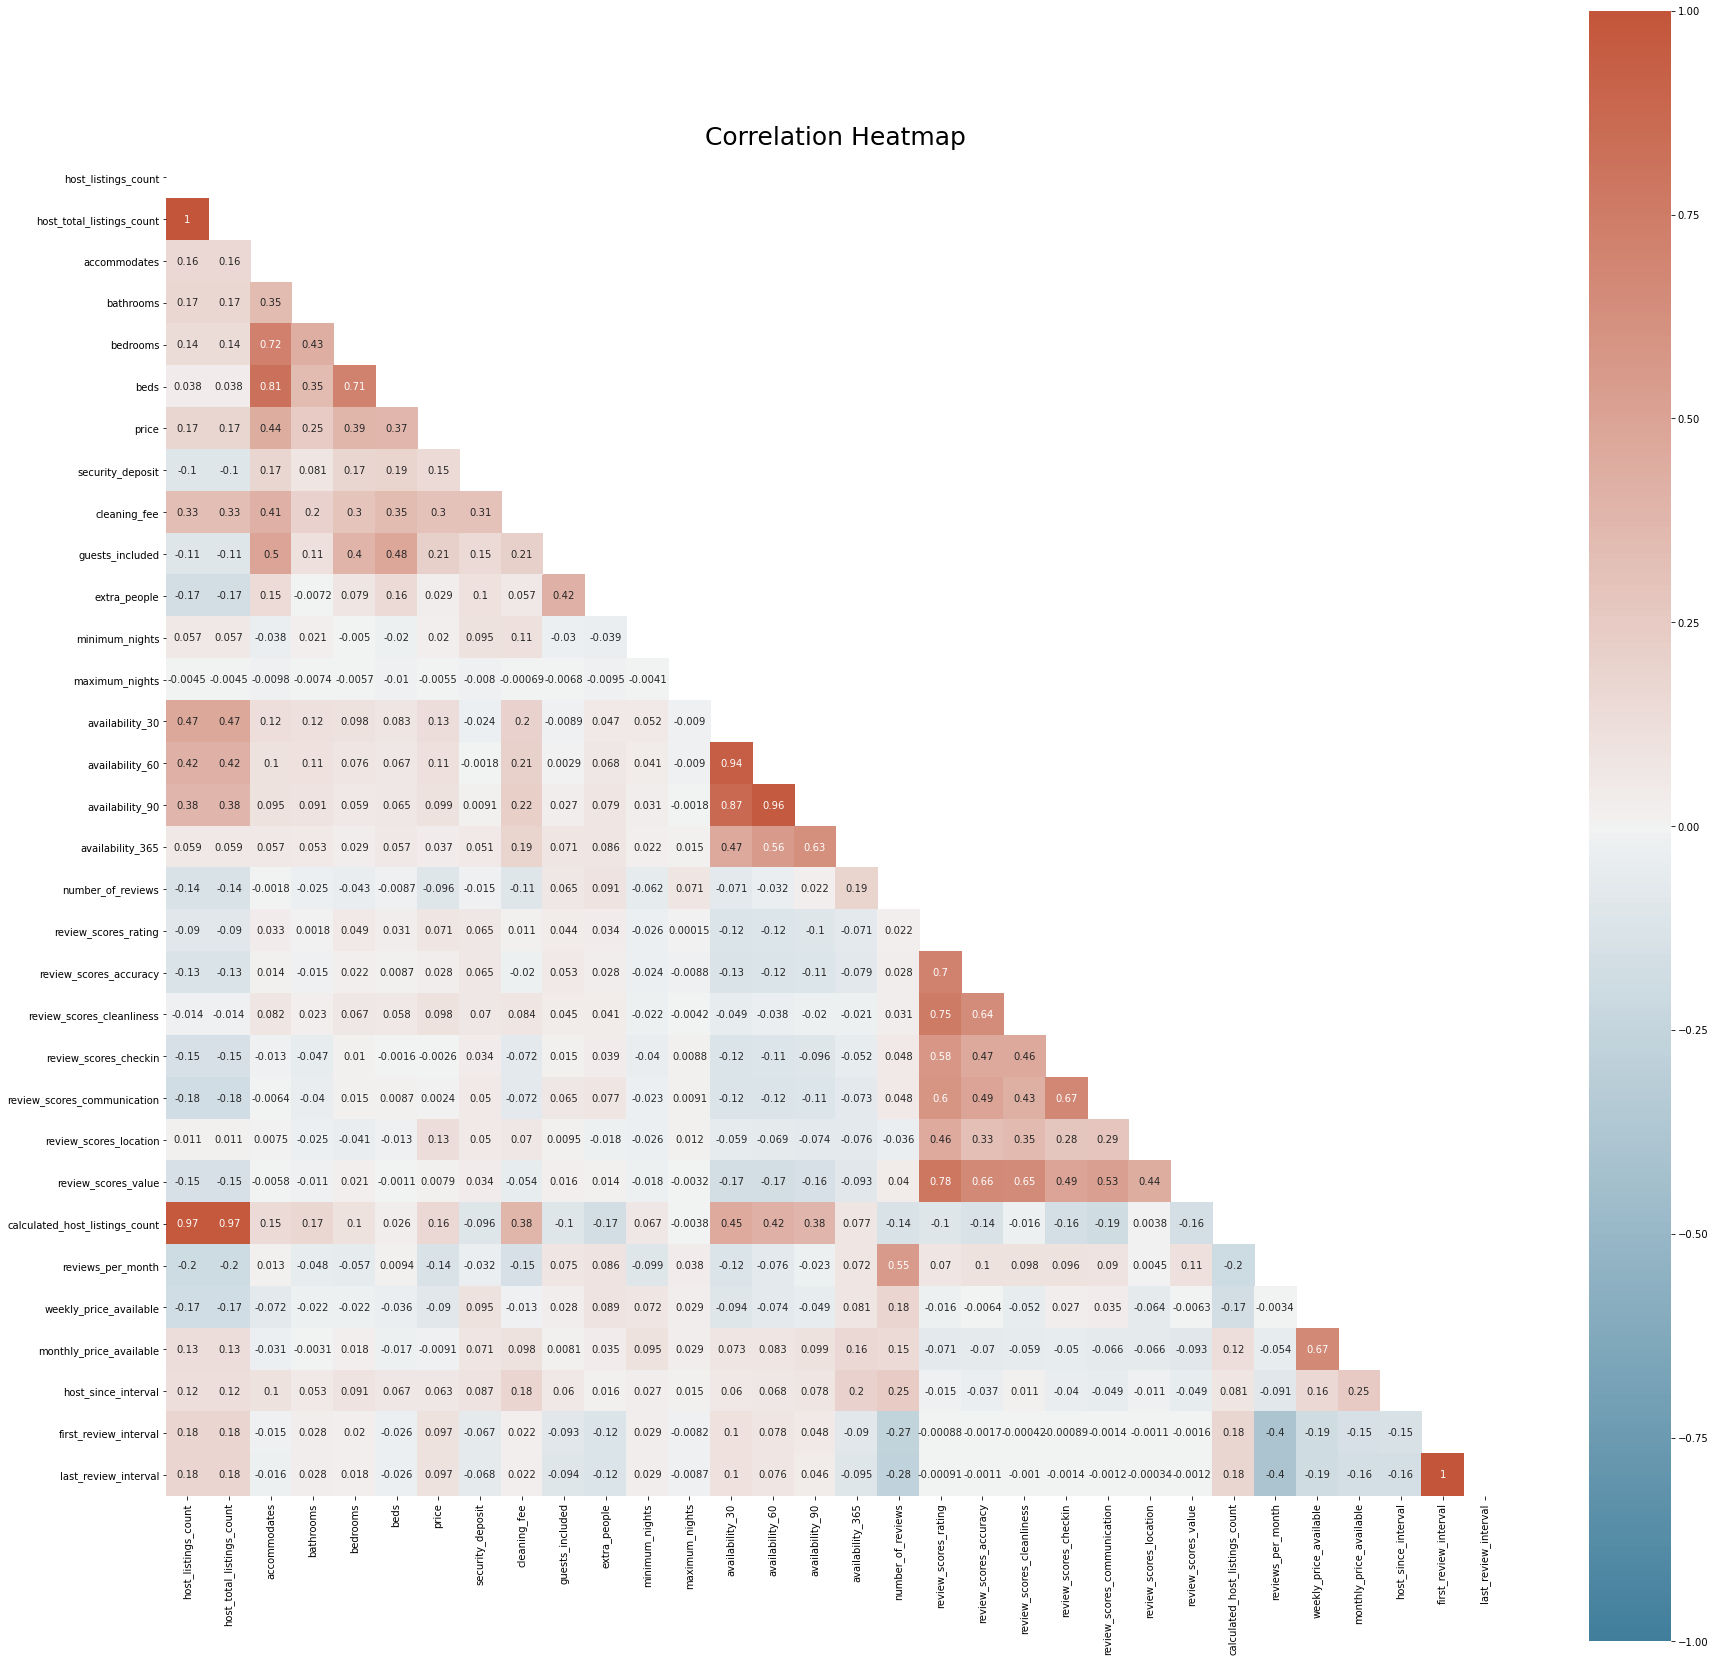

In [25]:
plt.figure(figsize=(30, 30))

#correlation matrix
corr = listings_df_clean.corr()
#mask to get only triangular heatmap
mask_matrix =  np.triu(corr)
# Colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, mask = mask_matrix,
                     cmap=cmap, square=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':25}, pad=12 );

### Findings from correlation heatmap
* Column pairs (host_total_listings_count, host_listings_count) abd (first_review_interval, last_review_interval) have perfect correlation - I will drop one of those columns
* calculated_host_listings_count has a correlation of 0.97 with host_total_listings_count and host_listings_coun, I will drop it as well.
* In line with intuition, the 'accomodates' columns is highly correlated with number of bedrooms and number of beds
* Price column has the highest correlation with acoomodates, beds and bedrooms features
* review_score features show high positive correlation with each other

In [26]:
columns_to_drop = ['host_total_listings_count', 'first_review_interval', 'calculated_host_listings_count']
listings_df_clean.drop(columns_to_drop, axis = 1, inplace = True)

### Handling the categorical features

A look at number of unique values in among categorical features (a feature with high cardinality will create a large number of new columns).

In [27]:
categorical_columns = listings_df_clean.select_dtypes(include= object).columns.tolist()

for col in categorical_columns:
    share_null = (listings_df_clean[col].isnull().sum() / listings_df_clean.shape[0])*100
#     print(col)
    nunique_values = listings_df_clean[col].nunique()
    print('column {} has {}% of empty values and {} unique values'.format(col, share_null, nunique_values));

column host_location has 0.30683403068340304% of empty values and 176 unique values
column host_response_time has 13.138075313807532% of empty values and 4 unique values
column host_response_rate has 13.138075313807532% of empty values and 52 unique values
column host_acceptance_rate has 13.138075313807532% of empty values and 72 unique values
column host_is_superhost has 0.0% of empty values and 2 unique values
column host_neighbourhood has 9.456066945606695% of empty values and 53 unique values
column host_verifications has 0.0% of empty values and 83 unique values
column host_has_profile_pic has 0.0% of empty values and 2 unique values
column host_identity_verified has 0.0% of empty values and 2 unique values
column neighbourhood_cleansed has 0.0% of empty values and 25 unique values
column is_location_exact has 0.0% of empty values and 2 unique values
column property_type has 0.08368200836820083% of empty values and 13 unique values
column room_type has 0.0% of empty values and 3 u

* host_location feature has 176 uniue values, while 80% of rows are attributed to Boston or 'US'. host_neighbourhood has 53 unique values. I decided to transform these features to new ones 
    * binary 'host_from_boston'
    * binary 'host_from_nieghbourhood', informing whether host noegbhourhood matches the apartment nierghbourhood (for hosts from Boston)
* host_response_rate and host_acceptance_rate are numerical features, showing rate in %. Need to be transformed to numerical columns
* host_response_time has 13% of missing values - I decided to fill nulls with "No response time" before one-hot-encoding
* host_verifications and amenities are collections of used verifications and provided ammenities. They could be transformed to binary columns per unqiue verification type and ammenity. For now I will replace them with numeric columns with information about number of provided verifications / amenities
* some columns already have only 2 unique values: If they are boolean, I'll just cast them to integer, with no need for one-hot-encoding
    * instant_bookable, require_guest_profile_picture, require_guest_phone_verification, is_location_exact, host_identity_verified, host_has_profile_pic, host_is_superhost
* calendar_updated column has 38 unique values like '5 weeks ago', '1 day ago' - they could be translated to a numerical values informing how long ago was the last update done. I decided to drop the column, as intuitively, the last calendar update (from scraping moment) should not impact the listed price.

In [28]:
# transforming the host location columns:
listings_df_clean['host_from_Boston'] = (listings_df_clean['host_location'] == 'Boston, Massachusetts, United States').astype(int)

listings_df_clean['host_from_nieghbourhood'] = ((listings_df_clean['host_location'] == 'Boston, Massachusetts, United States') &
                                                (listings_df_clean['host_neighbourhood'] == listings_df_clean['neighbourhood_cleansed'])
                                               ).astype(int)

listings_df_clean.drop(['host_location','host_neighbourhood'], inplace = True, axis = 1)

In [29]:
# cleaning and transforming the response rate columns
clean_numerical_columns(listings_df_clean,
                    columns = ['host_response_rate', 'host_acceptance_rate'],
                   symbols_to_drop = ["%"])

In [30]:
#filling missing value for host_response_time as "No response time"
listings_df_clean['host_response_time'] = listings_df_clean['host_response_time'].fillna("No response time")

In [31]:
# replacing amenities and host_verifications with count of answers provided
def count_answers(df, column_names, delim):
    '''
    INPUTS:
    df - dataframe to be modified
    column_name - list of column names to be modified
    delim - delimiter, which will be used to count unique values in the specified columns
    
    For the provided column list new columns are created, containing count of items within original columns.
    Original columns are then dropped from the data frame
    
    '''
    
    for col in column_names:
        if col in df.columns:
            new_col = col + '_count'
            df[new_col] = df[col].str.count(delim).astype(int) + 1
            df[new_col].fillna(0, inplace = True)
            print('column ', new_col, ' created')
            df.drop(col, inplace=True, axis=1)
            print('column ', col, ' dropped')  
    

count_answers(listings_df_clean, column_names = ['amenities', 'host_verifications'], delim = ',')


column  amenities_count  created
column  amenities  dropped
column  host_verifications_count  created
column  host_verifications  dropped


In [32]:
# dropping the problematic calendar_updated column:
listings_df_clean.drop('calendar_updated', axis = 1, inplace = True)

#### one-hot-encoding the remaining categorical columns

Dealing with the boolean columns, that have string 't'/'f' values:

In [33]:
boolean_columns = ['instant_bookable', 'require_guest_profile_picture',
                   'require_guest_phone_verification', 'is_location_exact',
                   'host_identity_verified', 'host_has_profile_pic', 'host_is_superhost']

#casting as boolean first to get from 't'/'f' to bools, then casting as integer
listings_df_clean[boolean_columns] = listings_df_clean[boolean_columns].astype(bool).astype(int)

In [34]:
categorical_columns = listings_df_clean.select_dtypes(include= object).columns.tolist()

for col in categorical_columns:

    share_null = (listings_df_clean[col].isnull().sum() / listings_df_clean.shape[0])*100
#     print(col)
    nunique_values = listings_df_clean[col].nunique()
    print('column {} has {}% of empty values and {} unique values'.format(col, share_null, nunique_values));

column host_response_time has 0.0% of empty values and 5 unique values
column neighbourhood_cleansed has 0.0% of empty values and 25 unique values
column property_type has 0.08368200836820083% of empty values and 13 unique values
column room_type has 0.0% of empty values and 3 unique values
column bed_type has 0.0% of empty values and 5 unique values
column cancellation_policy has 0.0% of empty values and 4 unique values


For one-hot encoding, I decided not to drop any of the crated columns. This creates redundancy in the data, but I want to be able to interpret the importance of specific values. 

In [35]:
columns_encoding = listings_df_clean.select_dtypes(include= object).columns.tolist()
listings_df_final = listings_df_clean

for column in columns_encoding:
    print(column)
    encoded_df = pd.get_dummies(listings_df_clean[column], prefix=column)
#     listings_df_clean.drop(column, axis = 1, inplace = True)
    
    #creating "final" data_frame, where categorical values that were source of one-hot-encoding are dropped
    listings_df_final = listings_df_final.join(encoded_df)
    
listings_df_final.drop(columns_encoding, axis = 1, inplace = True)

host_response_time
neighbourhood_cleansed
property_type
room_type
bed_type
cancellation_policy


#### Modelling the price feature

In [36]:
#train-test spli

X = listings_df_final.loc[:,~(listings_df_final.columns == 'price')]
y = listings_df_final['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)


In [37]:
#funciton to assess the models:
def assess_model(predictions, true_labels, model_name):
    mean_abs_error = abs(predictions - true_labels)
    r2 = r2_score(true_labels, predictions)
    mse = mean_squared_error(true_labels, predictions)
    
    print(model_name, ': ')
    print('Mean Absolute Error: ', np.mean(mean_abs_error))
    print('R^2: ', r2)
    print('MSE: ', mse)

Baseline prediction: average price:

In [38]:
price_mean = np.mean(listings_df_clean.price)
baseline_pred = [price_mean for i in range(len(y_test))]

assess_model(baseline_pred, y_test, "baseline (mean price)")

baseline (mean price) : 
Mean Absolute Error:  87.94015744355549
R^2:  -0.00120387447132142
MSE:  15998.861055264751


random forest regressor with 100 treees (I tried bigger number of trees, but they showed little improvement on prediction):

In [39]:
model_random_forest = RandomForestRegressor(n_estimators = 100, random_state = 25)
model_random_forest.fit(X_train, y_train)

predictions_rf = model_random_forest.predict(X_test)

assess_model(predictions_rf, y_test, "random_forest_100")


random_forest_100 : 
Mean Absolute Error:  48.389375041508934
R^2:  0.4618057726659124
MSE:  8600.141173455155


Elastic Net linear regression:

In [40]:
model_elastic_net = ElasticNet(random_state=25)
model_elastic_net.fit(X_train, y_train)

prediction_en = model_elastic_net.predict(X_test)

assess_model(prediction_en, y_test, "elastic_net_default")

elastic_net_default : 
Mean Absolute Error:  216.1452808982495
R^2:  -1083.6486764334754
MSE:  17332277.58152573


I tried a linear model with regularisation as anoher approach, but clearly the results are very poor. Either it's hard to predict the price with a linear model, or the default parameters are not enough and some hyperparameters tuning and better handling of data would be useful.
I suppose that for the linear model, the fact that I have not removed one of the one-hot encoded columns per feature, can be problematic. Additionally, I have not performed data normalisation, as it's not suugested for the random forest models

#### Feature importance from the RF model:

Using Shap method to interpret features importance and the way they influence the predictions

In [41]:
explainer = shap.TreeExplainer(model_random_forest)
shap_values = explainer.shap_values(X_test)

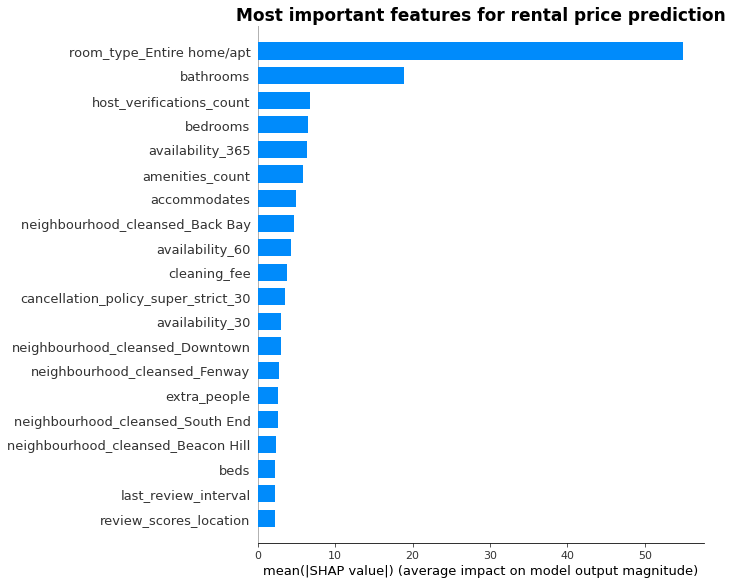

In [42]:
shap_summary_plot = shap.summary_plot(shap_values, X_test, plot_type="bar",
                                     show = False)

plt.title("Most important features for rental price prediction",
         fontsize=17, fontdict={"weight": "bold"})
plt.show()

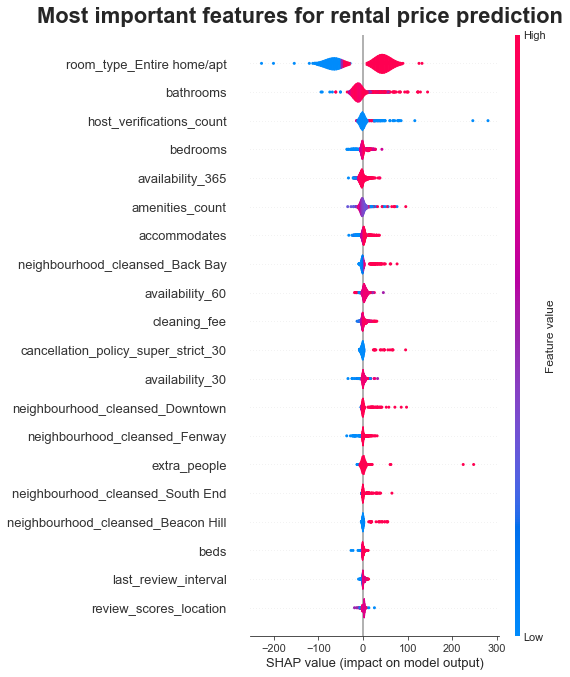

In [53]:
plt.figure(figsize=(10, 10))
shap_summary_plot = shap.summary_plot(shap_values, X_test, show=False,
                                     plot_type="violin")

plt.title("Most important features for rental price prediction",
         fontsize=22, fontdict={"weight": "bold"},
          x = 0.2, y = 1.01)
plt.tight_layout()
plt.savefig('shap_summary_plot.png')
plt.show()

### Key features
* room type is a most important feature in the dataset. It makes sense, as rental of full houses / apartments would naturally be more expensive than rental of rooms
* Number of bedroom, bathrooms and accomodates features are also important. The bigger the value of the features, the bigger the model prediction. This also makes intuitive sense, as bigger appartments will have higher price.
* host_verifications_count is an interesting one. It looks that there are some paratments that have very high number of verificstion methods and model is penalising that feature, lowering the predicted price for them. I do not have a strong business explanation for this. Maybe hostels that rent shared rooms, tend to have a lot of verifcation methods and are renting cheaper type of property?
* There is a number of neighbourhood related features, that show neighbourhoods where prices are higher (Back Bay, Downtown, Fenway, South End, Beacon Hill)

<Figure size 1080x1080 with 0 Axes>

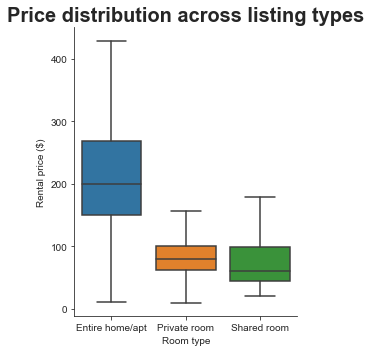

In [121]:
sns.set_style("ticks")
plt.figure(figsize=(15,15))
boxplot_room_type = sns.catplot(y = "price", x = "room_type", data = listings_df_clean, kind="box",
           showfliers = False,
                               );

boxplot_room_type.set(xlabel='Room type', ylabel='Rental price ($)')
boxplot_room_type.ax.set_title("Price distribution across listing types",
                  fontsize=20, fontdict={"weight": "bold"}, x = 0.5, y = 1);
plt.tight_layout()
plt.subplots_adjust(top=0.8)
plt.savefig('boxplot_room_type.png')
plt.show()

<Figure size 1080x1080 with 0 Axes>

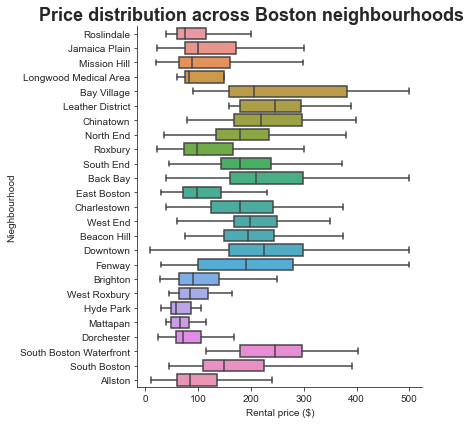

In [120]:
sns.set_style("ticks")
plt.figure(figsize=(15, 15))

boxplot_neighbourhood = sns.catplot(x = "price", y = "neighbourhood_cleansed",
                                    data = listings_df_clean, kind="box",
                                    showfliers = False, height = 6,
                                    aspect = 1.1)

boxplot_neighbourhood.set(ylabel='Nieghbourhood', xlabel='Rental price ($)')
boxplot_neighbourhood.ax.set_title("Price distribution across Boston neighbourhoods",
                  fontsize=18, fontdict={"weight": "bold"}, x = 0.4, y = 1.01);

plt.tight_layout()
plt.subplots_adjust(top=0.9, wspace=0.1, hspace=0.5)
plt.savefig('boxplot_neighbourhood.png')
plt.show();